In [36]:
from nltk.tokenize import word_tokenize 
import nltk
import numpy as np
nltk.download('punkt')
import pandas as pd
train = pd.read_csv('/Users/zhouruohe/Downloads/train.csv')
test = pd.read_csv('/Users/zhouruohe/Downloads/test.csv')
train.head()
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()
from nltk.tokenize import word_tokenize
import nltk
import numpy as np
nltk.download('punkt')
import pandas as pd
import pickle
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package punkt to /Users/zhouruohe/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zhouruohe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/zhouruohe/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### NLP Clearning
#### Tokenizing; LowerCase; Remove Punctuations & Stopwords; Steming

In [11]:
def nlp(text_str):
    k = word_tokenize(text_str)
    for i in range(len(k)):
        k[i] = k[i].lower()
    k = [ps.stem(i) for i in k if i not in list(string.punctuation) and i not in stopwords.words('english')]
    k = " ".join(k)
    return k
for i in range(len(train['text'])):
    train['text'][i] = nlp(train['text'][i])


/var/folders/nr/r7m_ksxd1zj2ttsw9nprxcv00000gn/T/ipykernel_56898/4225160402.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['text'][i] = nlp(train['text'][i])


### Transform sentences to matrix of word counts

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit(train['text'])
x_train = tfidf.transform(train['text'])
x_train
y_train = train['target']

In [29]:
len_train = int(x_train.shape[0]*0.7)
train_x = x_train[:len_train]
test_x = x_train[len_train:]
train_y = y_train[:len_train]
test_y =  y_train[len_train:]

### Naive Bayes

In [46]:
train_x.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [47]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(train_x.toarray(), train_y)

GaussianNB()

In [49]:
y_pred_test = classifier.predict(test_x.toarray())
y_pred_train = classifier.predict(train_x.toarray())

In [50]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(train_y, y_pred_train))
print("Accuracy:",metrics.accuracy_score(test_y, y_pred_test))

Accuracy: 0.9485832238693939
Accuracy: 0.5818739054290718


<AxesSubplot: >

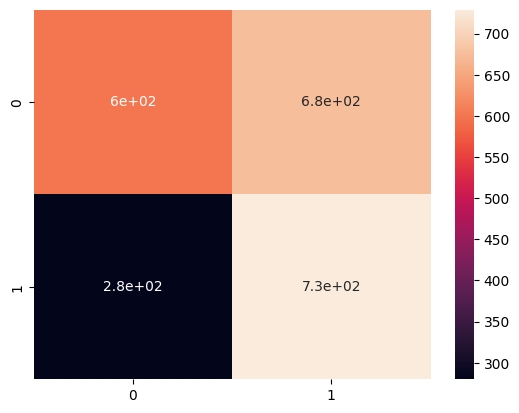

In [51]:
cf_matrix = confusion_matrix(test_y, y_pred_test)
sns.heatmap(cf_matrix, annot=True)

### False Positive: 680; False Negative: 280

### Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100,
                                random_state=123,
                                max_depth = 50)
forest.fit(train_x, train_y)

RandomForestClassifier(max_depth=50, random_state=123)

In [34]:
from sklearn import metrics
y_pred_test = forest.predict(test_x)
y_pred_train = forest.predict(train_x)
print("Accuracy:",metrics.accuracy_score(train_y, y_pred_train))
print("Accuracy:",metrics.accuracy_score(test_y, y_pred_test))

Accuracy: 0.8474385438168512
Accuracy: 0.7193520140105079


<AxesSubplot: >

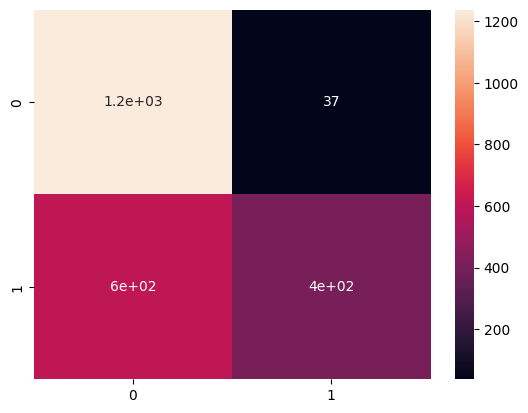

In [37]:
import seaborn as sns
cf_matrix = confusion_matrix(test_y, y_pred_test)
sns.heatmap(cf_matrix, annot=True)

### False Positive: 37; False Negative: 600

### Cat Boost

In [38]:
from catboost import CatBoostClassifier
cat_boost = CatBoostClassifier(verbose=0, random_state = 123)
cat_boost.fit(train_x, train_y)

In [39]:
y_pred_test = cat_boost.predict(test_x)
y_pred_train = cat_boost.predict(train_x)
print("Accuracy:",metrics.accuracy_score(train_y, y_pred_train))
print("Accuracy:",metrics.accuracy_score(test_y, y_pred_test))

Accuracy: 0.8525051604428598
Accuracy: 0.7132224168126094


<AxesSubplot: >

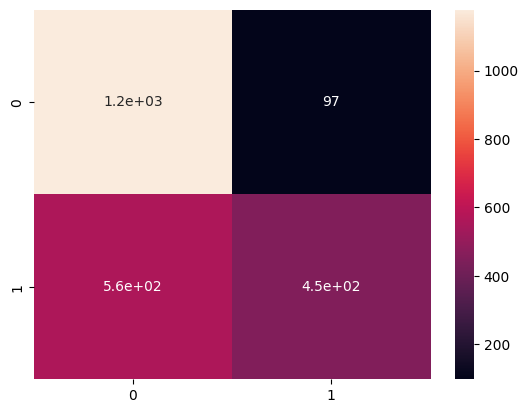

In [40]:
cf_matrix = confusion_matrix(test_y, y_pred_test)
sns.heatmap(cf_matrix, annot=True)

### False Positive: 97; False Negative: 560

### XGBoost  (Took a long time to run)

In [41]:
from xgboost import XGBClassifier
xg_classifier1 = XGBClassifier(random_state = 123)
xg_classifier1.fit(train_x, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=123, ...)

In [42]:
y_pred_test = xg_classifier1.predict(test_x)
y_pred_train = xg_classifier1.predict(train_x)
print("Accuracy:",metrics.accuracy_score(train_y, y_pred_train))
print("Accuracy:",metrics.accuracy_score(test_y, y_pred_test))

Accuracy: 0.8768999812347532
Accuracy: 0.7298598949211909


<AxesSubplot: >

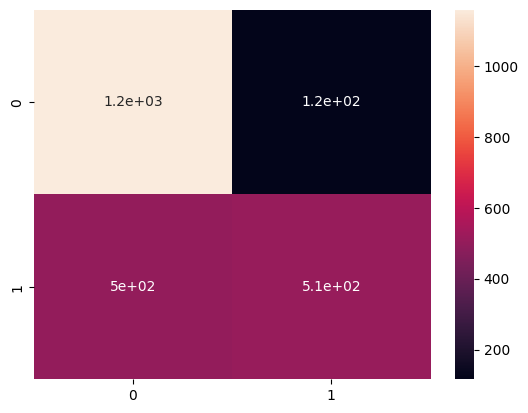

In [43]:
cf_matrix = confusion_matrix(test_y, y_pred_test)
sns.heatmap(cf_matrix, annot=True)

### False Positive: 120; False Negative: 500